In [ ]:
# Import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

# Load the dataset from the Kaggle URL
df = pd.read_csv('/content/kc_house_data.csv')

# Display the first 5 rows and a summary of the data
print(df.head())
print(df.info())

           id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7      1180.0              0   
1      7242     2.0           0     0  ...      7      2170.0            400   
2     10000     1.0           0     0  ...      6       770.0              0   
3      5000     1.0           0     0  ...      7      1050.0            910   
4      8080     1.0           0     0  ...      8      1680.0              0   

   yr_built  yr_renovated  zipcode      lat     lo

In [ ]:
df.isnull().sum()


,0
id,0
date,0
price,0
bedrooms,0
bathrooms,0
sqft_living,0
sqft_lot,0
floors,0
waterfront,0
view,0


In [ ]:
df['sqft_above'] = df['sqft_above'].fillna(df['sqft_above'].median())


In [ ]:
# df['sqft_above'].isnull().sum()
df['sqft_above'].isnull().any()


np.True_

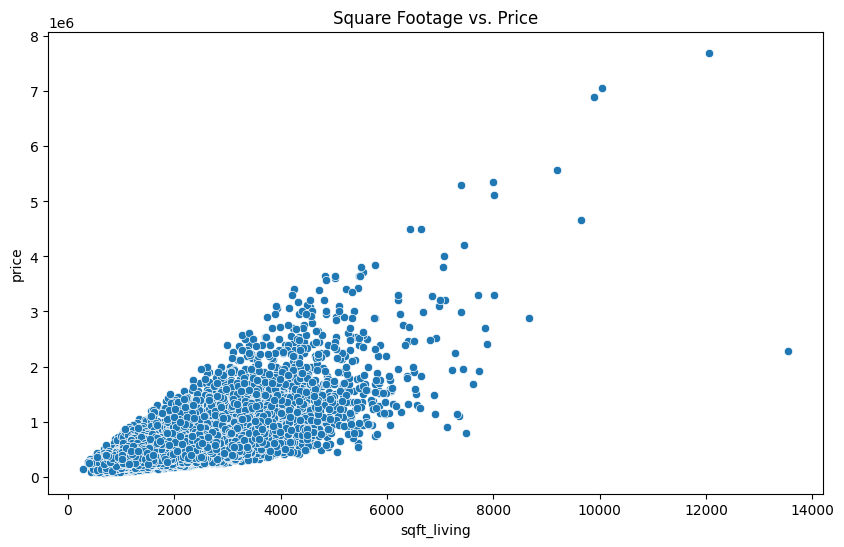

In [ ]:
# Visualize the relationship between square footage and price
plt.figure(figsize=(10, 6))
sns.scatterplot(x='sqft_living', y='price', data=df)
plt.title('Square Footage vs. Price')
plt.show()

In [ ]:
# plt.figure(figsize=(6, 3))
# sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
# plt.title('Correlation Matrix of House Data')

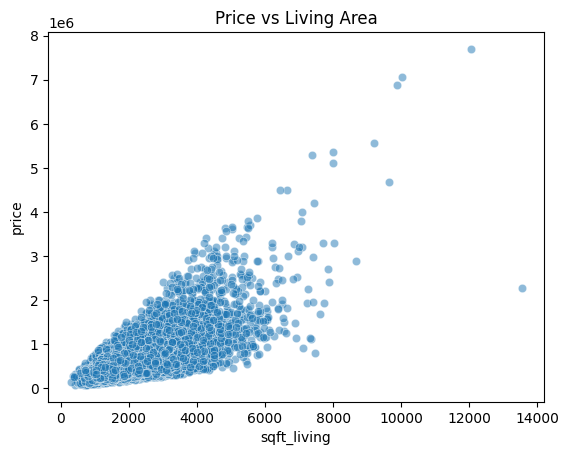

In [ ]:
  sns.scatterplot(x="sqft_living", y="price", data=df, alpha=0.5)
  plt.title("Price vs Living Area")
  plt.show()



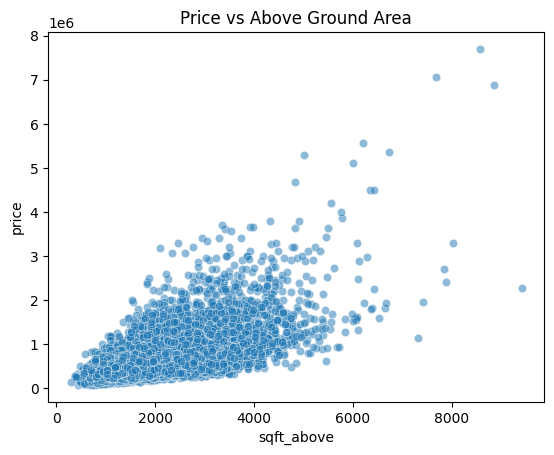

In [ ]:
  sns.scatterplot(x="sqft_above", y="price", data=df, alpha=0.5)
  plt.title("Price vs Above Ground Area")
  plt.show()



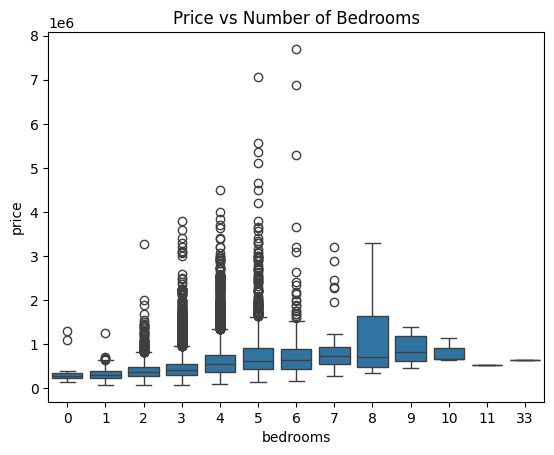

In [ ]:
  sns.boxplot(x="bedrooms", y="price", data=df)
  plt.title("Price vs Number of Bedrooms")
  plt.show()



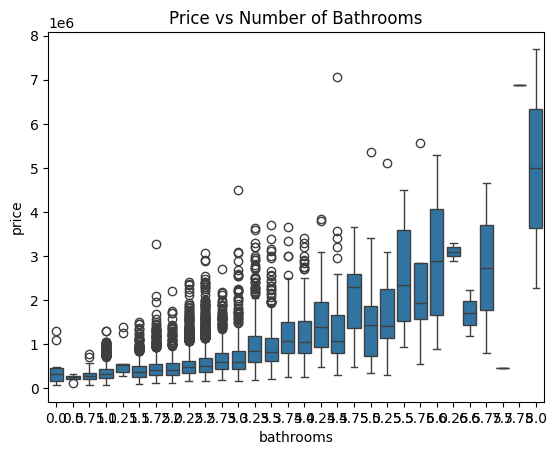

In [ ]:
  sns.boxplot(x="bathrooms", y="price", data=df)
  plt.title("Price vs Number of Bathrooms")
  plt.show()



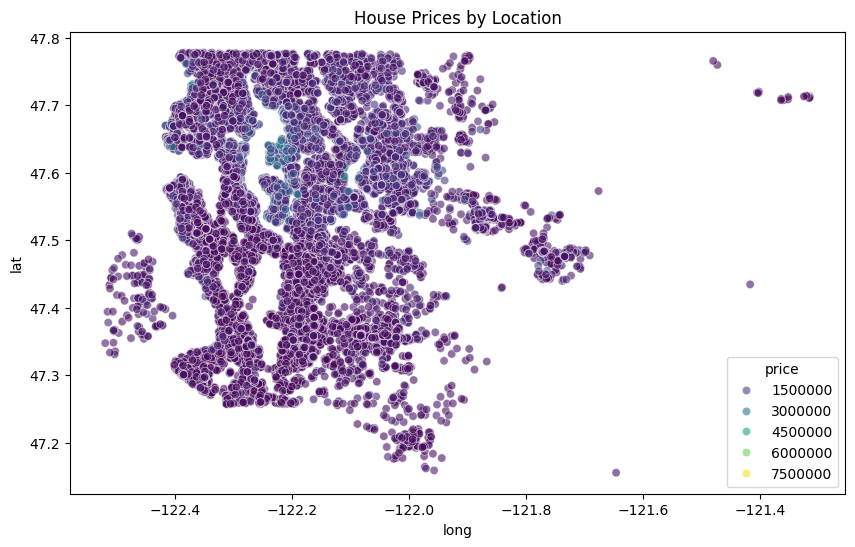

In [ ]:

  plt.figure(figsize=(10,6))
  sns.scatterplot(x="long", y="lat", hue="price", data=df, palette="viridis", alpha=0.6)
  plt.title("House Prices by Location")
  plt.show()



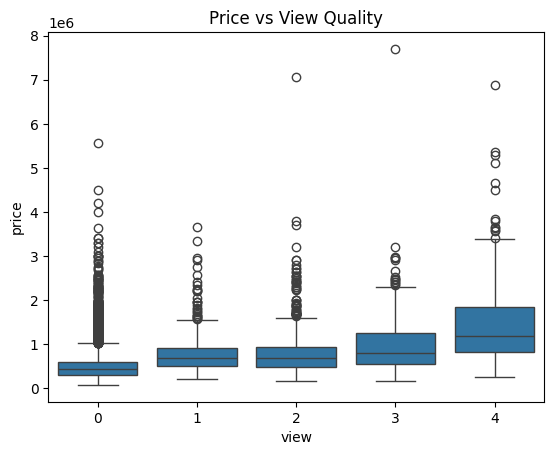

In [ ]:
  sns.boxplot(x="view", y="price", data=df)
  plt.title("Price vs View Quality")
  plt.show()



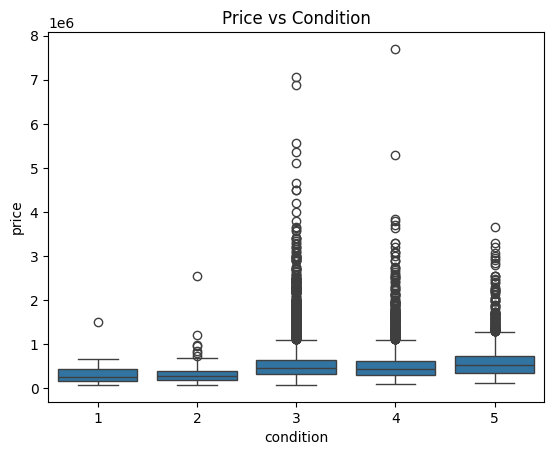

In [ ]:
  sns.boxplot(x="condition", y="price", data=df)
  plt.title("Price vs Condition")
  plt.show()



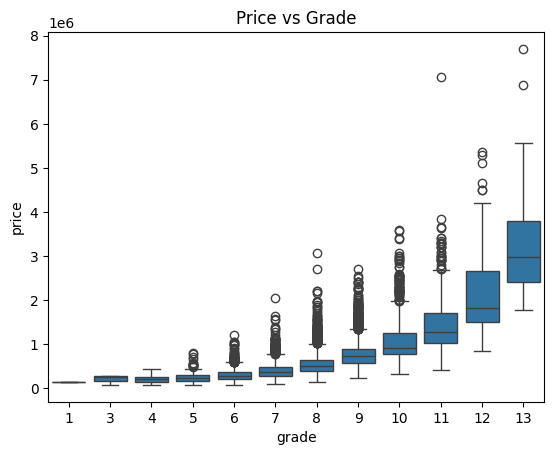

In [ ]:
  sns.boxplot(x="grade", y="price", data=df)
  plt.title("Price vs Grade")
  plt.show()

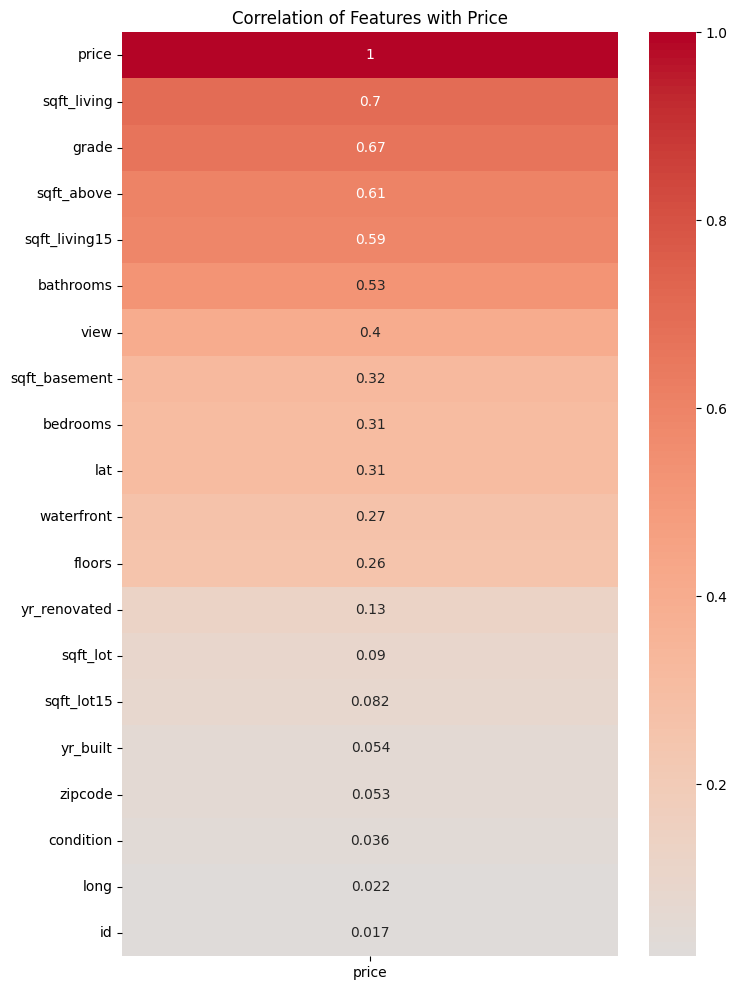

In [ ]:

corr_matrix = df.corr(numeric_only=True)

# Get correlation with 'price' column
corr_with_target = corr_matrix[['price']].abs()  # Keep it as a DataFrame

# Plot heatmap
plt.figure(figsize=(8, 12))
sns.heatmap(corr_with_target.sort_values(by='price', ascending=False),
            annot=True, cmap="coolwarm", center=0)
plt.title("Correlation of Features with Price")
plt.show()


In [ ]:
selected_features = corr_with_target[corr_with_target['price'] >= 0.4].index.tolist()
selected_features = [f for f in selected_features if f != 'price']
print( selected_features)


['bathrooms', 'sqft_living', 'grade', 'sqft_above', 'sqft_living15']


In [ ]:
# Get features with correlation >= 0.27
extra_features = corr_with_target[corr_with_target['price'] >= 0.25].index.tolist()

# Remove target itself
extra_features = [f for f in extra_features if f != 'price']

# Find the ones NOT already in selected_features
new_features = [f for f in extra_features if f not in selected_features]

# Combine both lists
final_features = selected_features + new_features

print("Final Selected Features:", final_features)

Final Selected Features: ['bathrooms', 'sqft_living', 'grade', 'sqft_above', 'sqft_living15', 'bedrooms', 'floors', 'waterfront', 'view', 'sqft_basement', 'lat']


In [ ]:
# numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
# sns.pairplot(df[numeric_cols].sample(min(500, len(df))))
# plt.show()


--- Visualizing Outliers with a Box Plot ---


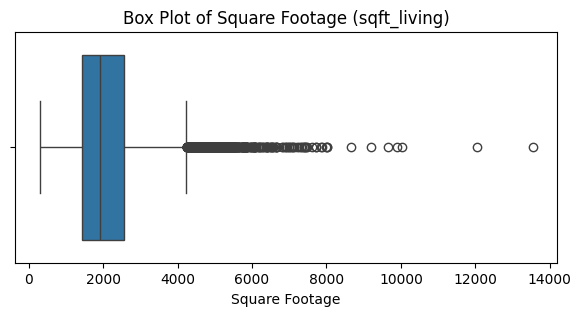

In [ ]:

print("\n--- Visualizing Outliers with a Box Plot ---")
plt.figure(figsize=(7, 3))
sns.boxplot(x=df['sqft_living'])
plt.title('Box Plot of Square Footage (sqft_living)')
plt.xlabel('Square Footage')
plt.show()


In [ ]:
Q1 = df['bathrooms'].quantile(0.25)
Q3 = df['bathrooms'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"\nLower Outlier Bound: {lower_bound:.2f}")
print(f"Upper Outlier Bound: {upper_bound:.2f}")

outliers_count = df[(df['bathrooms'] < lower_bound) | (df['bathrooms'] > upper_bound)].shape[0]
print(f"\nNumber of outliers in 'bathrooms': {outliers_count}")



Lower Outlier Bound: 0.62
Upper Outlier Bound: 3.62

Number of outliers in 'bathrooms': 571


In [ ]:
from sklearn.preprocessing import OneHotEncoder

categorical_features = ['waterfront']
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
encoded_features = encoder.fit_transform(df[categorical_features])
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(categorical_features))

# Drop original columns and concatenate the new encoded columns
df = df.drop(columns=categorical_features)
df = pd.concat([df, encoded_df], axis=1)

In [ ]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()


In [ ]:
labels = df['price']
conv_dates = [1 if values == 2014 else 0 for values in df.date ]
df['date'] = conv_dates
train1 = df.drop(['id', 'price'],axis=1)


#isko clear krna hai kya likha hai??

In [ ]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,waterfront_0,waterfront_1
0,7129300520,0,221900.0,3,1.00,1180,5650,1.0,0,3,...,0,1955,0,98178,47.5112,-122.257,1340,5650,1.0,0.0
1,6414100192,0,538000.0,3,2.25,2570,7242,2.0,0,3,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,1.0,0.0
2,5631500400,0,180000.0,2,1.00,770,10000,1.0,0,3,...,0,1933,0,98028,47.7379,-122.233,2720,8062,1.0,0.0
3,2487200875,0,604000.0,4,3.00,1960,5000,1.0,0,5,...,910,1965,0,98136,47.5208,-122.393,1360,5000,1.0,0.0
4,1954400510,0,510000.0,3,2.00,1680,8080,1.0,0,3,...,0,1987,0,98074,47.6168,-122.045,1800,7503,1.0,0.0


In [ ]:
# from sklearn.model_selection import train_test_split
# x_train , x_test , y_train , y_test = train_test_split(train1 , labels , test_size = 0.10,random_state =2)
# reg.fit(x_train,y_train)
# reg.score(x_test,y_test)

#yaha error aaya kyuki dataset me NaN vlaues thi
#ya toh unn tuples ko frop krdo
#ya toh unko fill krdo
#SimpleImputer(strategy="mean")
#use pipeline -->>>> preprocessing with model in one pipe

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Predict
y_pred = reg.predict(x_test)

# Calculate metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("MAE :", mae)
print("MSE :", mse)
print("RMSE:", rmse)
print("R²  :", r2)


MAE : 126915.70740871201
MSE : 39156843283.93506
RMSE: 197880.88155234972
R²  : 0.7320325315980865


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

clf = ensemble.GradientBoostingRegressor(
    n_estimators=400,
    max_depth=5,
    min_samples_split=2,
    learning_rate=0.1,
    loss='squared_error',
    random_state=42
)

# Train
clf.fit(x_train, y_train)

# Predict
y_pred = clf.predict(x_test)

# Evaluation
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("MAE :", mae)
print("MSE :", mse)
print("RMSE:", rmse)
print("R²  :", r2)



MAE : 62918.6837719377
MSE : 11561431233.569061
RMSE: 107524.09606022765
R²  : 0.9208800506134422


In [ ]:
# yaha accuracy bht bdd gyi thi
# so isko smjhna bht important hai

In [ ]:
# note :: bss Rsquare check nhi krna hai ??  aur kon konse evaulation matrix cehck kr skte hai aur konsa le ??
# har model ka alag alag aaega ?? toh konsa fix kre ?? rms mae mse

In [ ]:
# f you want robust regression against outliers → use loss="huber".

# If you want to minimize absolute deviations → use loss="absolute_error".

# For normal regression tasks → stick with "squared_error".
#kab konsa use krna hai

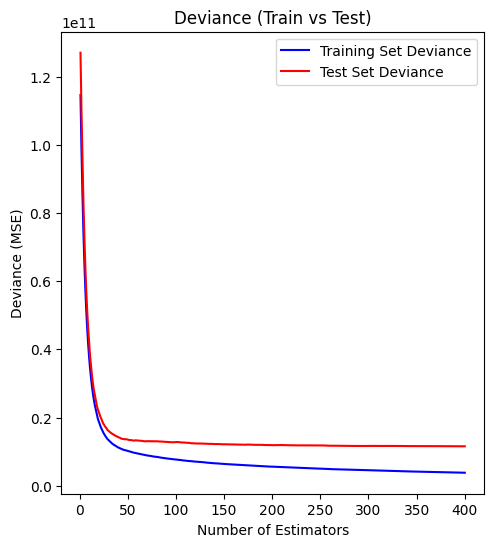

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# Track test deviance (MSE) for each stage
t_sc = np.zeros((clf.n_estimators,), dtype=np.float64)

for i, y_pred_stage in enumerate(clf.staged_predict(x_test)):
    t_sc[i] = mean_squared_error(y_test, y_pred_stage)

# X-axis (number of trees)
testsc = np.arange(clf.n_estimators) + 1

# Plot training vs test deviance
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(testsc, clf.train_score_, 'b-', label='Training Set Deviance')
plt.plot(testsc, t_sc, 'r-', label='Test Set Deviance')
plt.xlabel('Number of Estimators')
plt.ylabel('Deviance (MSE)')
plt.title('Deviance (Train vs Test)')
plt.legend()
plt.show()

# ye kya ho rha hai >>> kyu use ho rha hai ???



In [ ]:
  # # sqft_living vs price

  # # sqft_above vs price

  # # bathrooms / bedrooms vs price

  # sns.scatterplot(x="sqft_living", y="price", data=df, alpha=0.5)
  # plt.title("Price vs Living Area")
  # plt.show()

  # sns.scatterplot(x="sqft_above", y="price", data=df, alpha=0.5)
  # plt.title("Price vs Above Ground Area")
  # plt.show()

  # sns.boxplot(x="bedrooms", y="price", data=df)
  # plt.title("Price vs Number of Bedrooms")
  # plt.show()

  # sns.boxplot(x="bathrooms", y="price", data=df)
  # plt.title("Price vs Number of Bathrooms")
  # plt.show()


  # plt.figure(figsize=(10,6))
  # sns.scatterplot(x="long", y="lat", hue="price", data=df, palette="viridis", alpha=0.6)
  # plt.title("House Prices by Location")
  # plt.show()


  # sns.boxplot(x="waterfront", y="price", data=df)
  # plt.title("Price Distribution by Waterfront")
  # plt.show()

  # sns.boxplot(x="view", y="price", data=df)
  # plt.title("Price vs View Quality")
  # plt.show()

  # sns.boxplot(x="condition", y="price", data=df)
  # plt.title("Price vs Condition")
  # plt.show()

  # sns.boxplot(x="grade", y="price", data=df)
  # plt.title("Price vs Grade")
  # plt.show()


  # Step 4. Multicollinearity Check (VIF)

  # Sometimes features are redundant (e.g., sqft_living and sqft_above).
  # Use Variance Inflation Factor (VIF) to detect multicollinearity.

  # Feature Importance (Tree-based Model)


#   🔹 Simple Rule of Thumb

# Choose RMSE (or MAE) as your main metric for model comparison.

# Use R² as a supporting metric.